<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Sklearn_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
GMM: A Gaussian mixture model is a probabilistic model that assumes all the 
data points are generated from a mixture of a finite number of Gaussian 
distributions with unknown parameters.

One can think of mixture models as generalizing k-means clustering to 
incorporate information about the covariance structure of the data as well as 
the centers of the latent Gaussians.

The GaussianMixture object implements the expectation-maximization (EM) 
algorithm for fitting mixture-of-Gaussian models. It can also draw confidence 
ellipsoids for multivariate models, and compute the 
Bayesian Information Criterion to assess the number of clusters in the data.

+ : It is the fastest algorithm for learning mixture models
    It will not bias the means towards zero, or bias the cluster sizes to have specific structures
    

- : When one has insufficiently many points per mixture, estimating the covariance 
    matrices becomes difficult, and the algorithm is known to diverge
    
    This algorithm will always use all the components it has access to
"""

In [0]:
"""
The main difficulty in learning Gaussian mixture models from unlabeled data 
is that it is one usually doesn’t know which points came from which latent 
component (if one has access to this information it gets very easy to fit a 
separate Gaussian distribution to each set of points).

EM Algo:

First one assumes random components and computes for each point a probability of 
being generated by each component of the model.
Then, one tweaks the parameters to maximize the likelihood of the data given those assignments.

"""

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [0]:
from sklearn.datasets import load_iris

iris = load_iris()

X=iris.data
y=iris.target

In [0]:
X = X[:, :2]

In [0]:
X.shape

(150, 2)

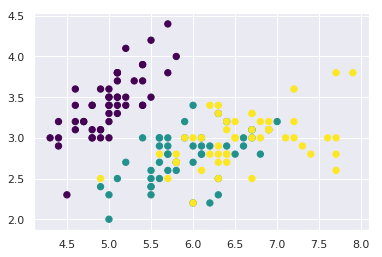

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis') #  Real

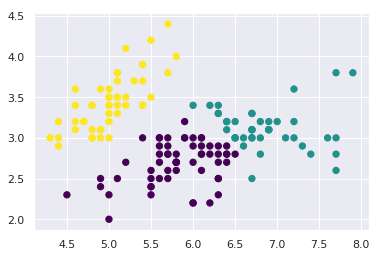

In [0]:
from sklearn import mixture
gmm =  mixture.GaussianMixture(n_components=3, covariance_type='full').fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis') #  GMM Picture

In [0]:
"""
Manifold learning is an approach to non-linear dimensionality reduction
Manifold Learning can be thought of as an attempt to generalize linear 
frameworks like PCA to be sensitive to non-linear structure in data.
"""

In [0]:
"""
The KMeans algorithm clusters data by trying to separate samples in n groups of 
equal variance, minimizing a criterion known as the inertia or within-cluster 
sum-of-squares
"""

In [0]:
"""
In basic terms, the algorithm has three steps. 
The first step chooses the initial centroids, with the most basic method 
being to choose k  samples from the dataset . After initialization, K-means 
consists of looping between the two other steps. The first step assigns each 
sample to its nearest centroid. The second step creates new centroids 
by taking the mean value of all of the samples assigned to each previous 
centroid. The difference between the old and the new centroids are 
computed and the algorithm repeats these last two steps until this value 
is less than a threshold. In other words, it repeats until the centroids 
do not move significantly.

K-means is equivalent to the expectation-maximization algorithm with a small, 
all-equal, diagonal covariance matrix.

k-means++ initializes the centroids to be (generally) distant from each other, 
leading to provably better results than random initialization

"""

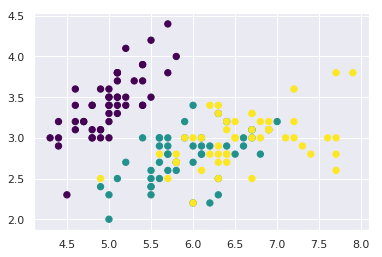

In [0]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y=iris.target

X = X[:, :2]

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')

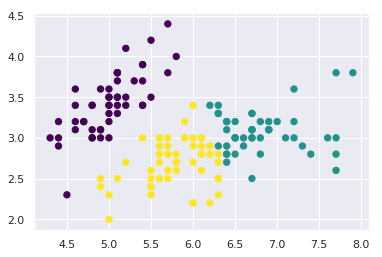

In [0]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis')

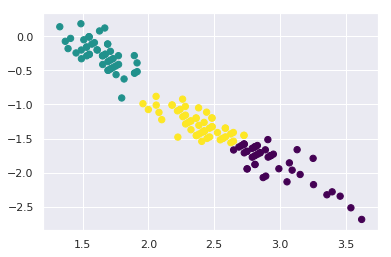

In [0]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)


y_pred_aniso = KMeans(n_clusters=3, random_state=42).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_aniso, s=40, cmap='viridis')

In [0]:
"""
The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches 
to reduce the computation time, while still attempting to optimise the same 
objective function. Mini-batches are subsets of the input data, randomly 
sampled in each training iteration.


In the first step,  samples are drawn randomly from the dataset, to form a 
mini-batch. These are then assigned to the nearest centroid. In the second step, 
the centroids are updated. In contrast to k-means, this is done on a per-sample basis.
"""

In [0]:
import time

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d


In [0]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [0]:
rng = np.random.RandomState(42)

kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size = (20, 20)

buffer=[]
index = 0

In [0]:
t0 = time.time()

for _ in range(6):
  for img in faces.images:
    data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
    data = np.reshape(data, (len(data), -1))
    buffer.append(data)
    index += 1
    if index % 10 == 0:
      data = np.concatenate(buffer, axis=0)
      data -= np.mean(data, axis=0)
      data /= np.std(data, axis=0)
      
      kmeans.partial_fit(data)
      buffer=[]
      
    if index%100 == 0:
      print('Partial fit of %4i out of %i'
                  % (index, 6 * len(faces.images)))
      
dt = time.time() - t0
print('done in %.2fs.' % dt)

Partial fit of  100 out of 2400
Partial fit of  200 out of 2400
Partial fit of  300 out of 2400
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Partial fit of 2200 out of 2400
Partial fit of 2300 out of 2400
Partial fit of 2400 out of 2400
done in 2.72s.


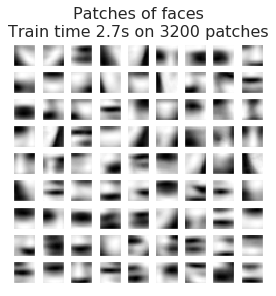

In [0]:
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
  plt.subplot(9, 9, i+1)
  plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation='nearest')
  plt.xticks(())
  plt.yticks(())
  
plt.suptitle('Patches of faces\nTrain time %.1fs on %d patches' %
             (dt, 8 * len(faces.images)), fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [0]:
"""
Affinity Propagation

AffinityPropagation creates clusters by sending messages between pairs of 
samples until convergence. A dataset is then described using a small number of 
exemplars, which are identified as those most representative of other samples. 
The messages sent between pairs represent the suitability for one sample to be 
the exemplar of the other, which is updated in response to the values from other 
pairs.

Two important parameters are the preference, which controls how many exemplars 
are used, and the damping factor which damps the responsibility and availability 
messages to avoid numerical oscillations

"""

In [0]:
"""Stock Data Clustering"""

import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import pandas as pd

from sklearn import cluster, covariance

In [0]:
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}


In [0]:
symbols, names = np.array(sorted(symbol_dict.items())).T

In [0]:
quotes=[]

for symbol in symbols:
  print('Fetching quote history for %r' % symbol, file=sys.stderr)
  url = ('https://raw.githubusercontent.com/scikit-learn/examples-data/'
           'master/financial-data/{}.csv')
  quotes.append(pd.read_csv(url.format(symbol)))
  
close_prices = np.vstack( [q['close'] for q in quotes])
open_prices  = np.vstack( [q['open'] for q in quotes])

variation = close_prices - open_prices

Fetching quote history for 'AAPL'
Fetching quote history for 'AIG'
Fetching quote history for 'AMZN'
Fetching quote history for 'AXP'
Fetching quote history for 'BA'
Fetching quote history for 'BAC'
Fetching quote history for 'CAJ'
Fetching quote history for 'CAT'
Fetching quote history for 'CL'
Fetching quote history for 'CMCSA'
Fetching quote history for 'COP'
Fetching quote history for 'CSCO'
Fetching quote history for 'CVC'
Fetching quote history for 'CVS'
Fetching quote history for 'CVX'
Fetching quote history for 'DD'
Fetching quote history for 'DELL'
Fetching quote history for 'F'
Fetching quote history for 'GD'
Fetching quote history for 'GE'
Fetching quote history for 'GS'
Fetching quote history for 'GSK'
Fetching quote history for 'HD'
Fetching quote history for 'HMC'
Fetching quote history for 'HPQ'
Fetching quote history for 'IBM'
Fetching quote history for 'JPM'
Fetching quote history for 'K'
Fetching quote history for 'KMB'
Fetching quote history for 'KO'
Fetching quote h

In [0]:
edge_model = covariance.GraphicalLassoCV(cv=5)

X = variation.copy().T
X /=X.std(axis=0)
edge_model.fit(X)

GraphicalLassoCV(alphas=4, assume_centered=False, cv=5, enet_tol=0.0001,
                 max_iter=100, mode='cd', n_jobs=None, n_refinements=4,
                 tol=0.0001, verbose=False)

In [0]:
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
  print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: Apple, Amazon, Yahoo
Cluster 2: Comcast, Cablevision, Time Warner
Cluster 3: ConocoPhillips, Chevron, Total, Valero Energy, Exxon
Cluster 4: Cisco, Dell, HP, IBM, Microsoft, SAP, Texas Instruments
Cluster 5: Boeing, General Dynamics, Northrop Grumman, Raytheon
Cluster 6: AIG, American express, Bank of America, Caterpillar, CVS, DuPont de Nemours, Ford, General Electrics, Goldman Sachs, Home Depot, JPMorgan Chase, Marriott, 3M, Ryder, Wells Fargo, Wal-Mart
Cluster 7: McDonald's
Cluster 8: GlaxoSmithKline, Novartis, Pfizer, Sanofi-Aventis, Unilever
Cluster 9: Kellogg, Coca Cola, Pepsi
Cluster 10: Colgate-Palmolive, Kimberly-Clark, Procter Gamble
Cluster 11: Canon, Honda, Navistar, Sony, Toyota, Xerox


In [0]:
"""
Mean Shift:
MeanShift clustering aims to discover blobs in a smooth density of samples. 
It is a centroid based algorithm, which works by updating candidates for 
centroids to be the mean of the points within a given region.

"""

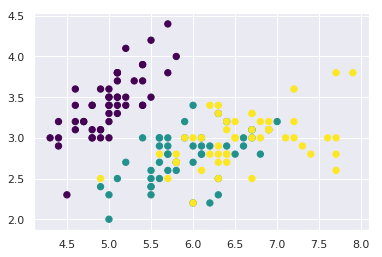

In [32]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y=iris.target

X = X[:, :2]

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')

In [0]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

In [0]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

y_pred = ms.fit_predict(X)

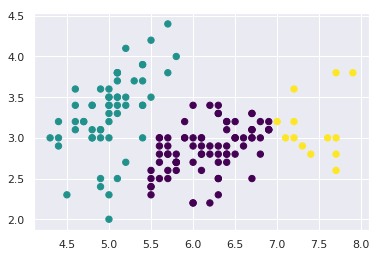

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis')

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import spectral_clustering
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y=iris.target

X = X[:, :2]

labels = spectral_clustering(X, n_clusters=2, eigen_solver='arpack') 

In [0]:
"""
Hierarchical clustering: It build nested clusters by merging or splitting them 
successively. This hierarchy of clusters is represented as a tree 
(or dendrogram). The root of the tree is the unique cluster that gathers 
all the samples, the leaves being the clusters with only one sample.

The AgglomerativeClustering object performs a hierarchical clustering using 
a bottom up approach: each observation starts in its own cluster, and clusters 
are successively merged together. The linkage criteria determines the metric 
used for the merge strategy:
- Ward: Minimizing sum of square distance within cluster
- Complete: Minimizes the maximum distance between observations of pairs of clusters
- Average : Minimizes the average of the distances between all observations of pairs of clusters.
- Single :  Minimizes the distance between the closest observations of pairs of clusters.

"""

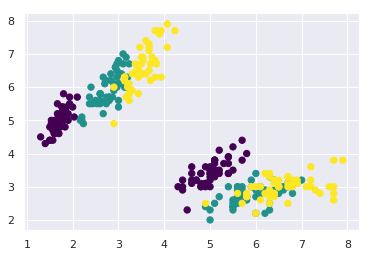

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import FeatureAgglomeration
from sklearn.datasets import load_iris
iris = load_iris()

X=iris.data
y=iris.target

X_agglo = FeatureAgglomeration(n_clusters=2).fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
plt.scatter(X_agglo[:, 0], X_agglo[:, 1], c=y, s=40, cmap="viridis")

In [0]:
"""
An interesting aspect of AgglomerativeClustering is that connectivity 
constraints can be added to this algorithm (only adjacent clusters can be 
merged together), through a connectivity matrix that defines for each sample 
the neighboring samples following a given structure of the data.
"""

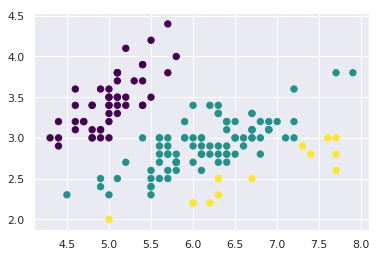

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
iris = load_iris()

X=iris.data
y=iris.target

X=X[:, :2]

y_pred = AgglomerativeClustering(n_clusters=3, linkage="average", affinity="cosine").fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap="viridis")

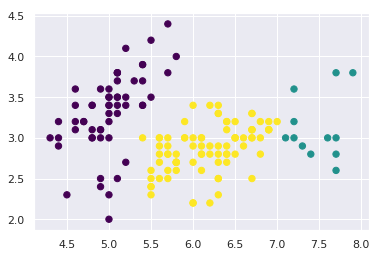

In [44]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage="average", affinity="euclidean").fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap="viridis")

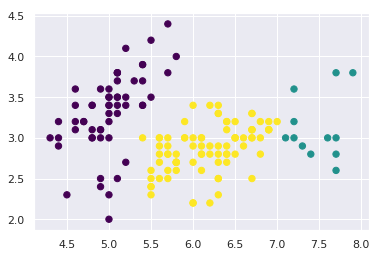

In [47]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage="average", affinity="cityblock").fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap="viridis")

In [0]:
"""
DBSCAN: 
The DBSCAN algorithm views clusters as areas of high density separated by 
areas of low density. Due to this rather generic view, clusters found by DBSCAN 
can be any shape, as opposed to k-means which assumes that clusters are convex 
shaped.

The central component to the DBSCAN is the concept of core samples, which are 
samples that are in areas of high density. A cluster is therefore a set of core 
samples, each close to each other (measured by some distance measure) and a set 
of non-core samples that are close to a core sample (but are not themselves core 
samples).


A core sample is considered as a core if it has min_samples within eps distance.
This tells us that the core sample is in a dense area of the vector space.
Further, neighbors of this core sample can potential become core samples themselves
if other samples are found with eps distance and this continous recursively.

Any core sample is part of a cluster, by definition. Any sample that is not a 
core sample, and is at least eps in distance from any core sample, is considered 
an outlier by the algorithm. 

eps is a crucial parameter to pick.

The DBSCAN algorithm is deterministic, always generating the same clusters when 
given the same data in the same order. However, the results can differ when 
data is provided in a different order. First, even though the core samples 
will always be assigned to the same clusters, the labels of those clusters 
will depend on the order in which those samples are encountered in the data. 
Second and more importantly, the clusters to which non-core samples are assigned 
can differ depending on the data order. This would happen when a non-core sample 
has a distance lower than eps to two core samples in different clusters. By the 
triangular inequality, those two core samples must be more distant than eps from 
each other, or they would be in the same cluster. The non-core sample is assigned 
to whichever cluster is generated first in a pass through the data, and so the 
results will depend on the data ordering.



"""

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [0]:
from sklearn.cluster import DBSCAN

from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

X = X[:, :2]

In [0]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

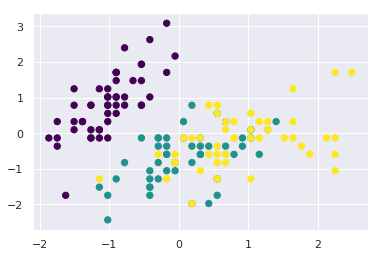

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = y, s=40, cmap="viridis")

In [0]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)

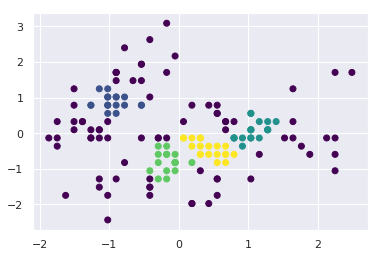

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="viridis")

Measure

In [14]:
#Adjusted Rand index
"""the Adjusted Rand index is a function that measures the similarity of the two 
assignments, ignoring permutations and with chance normalization:"""

from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424246

In [15]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424246

In [17]:
#Mutual Information based scores
metrics.adjusted_mutual_info_score(labels_true, labels_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.2250422831983088

In [0]:
#Silhouette Coefficient

"""If the ground truth labels are not known, evaluation must be performed 
using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) 
is an example of such an evaluation, where a higher Silhouette Coefficient score 
relates to a model with better defined clusters. """

"""
Defined as 
a = mean distance between samples and other samples within a cluster
b = mean distance between samples and other samples from next cluster

s = (b -a) / max(b, a)

a > b the s < 0
"""

In [19]:
metrics.silhouette_score(X, db.labels_, metric='euclidean')

-0.011183483873523121

In [20]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(y, db.labels_)

"""
[33, 17,  0,  0,  0] means there were 50 examples in total which this target, cluster 0 had 33, cluster 1 had 17 rest do not have any.
"""

array([[33, 17,  0,  0,  0],
       [22,  0,  7, 12,  9],
       [23,  0, 12,  5, 10]])

In [0]:
# Biclustering
"""
Basically finding submatrix from original matrix
The submatrix is has some columns and rows in it.


Spectral Co-Clustering:

The SpectralCoclustering algorithm finds biclusters with values higher than 
those in the corresponding other rows and columns. Each row and each column 
belongs to exactly one bicluster, so rearranging the rows and columns to make 
partitions contiguous reveals these high values along the diagonal:


Example: Biclustering documents with the Spectral Co-clustering algorithm¶
"""

In [0]:
from collections import defaultdict
import operator
from time import time

import numpy as np
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets.twenty_newsgroups import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.cluster import v_measure_score

In [0]:
def number_normalizer(tokens):
  return ("#NUMBER" if token[0].isdigit() else token for token in tokens)

In [0]:
class NumberNormalizingVectorizer(TfidfVectorizer):
  def build_tokenizer(self):
    tokenizer = super().build_tokenizer()
    return lambda doc: list(number_normalizer(tokenizer(doc)))

In [0]:
categories = ['alt.atheism', 'comp.graphics',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'comp.windows.x', 'misc.forsale', 'rec.autos',
              'rec.motorcycles', 'rec.sport.baseball',
              'rec.sport.hockey', 'sci.crypt', 'sci.electronics',
              'sci.med', 'sci.space', 'soc.religion.christian',
              'talk.politics.guns', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']

In [27]:
newsgroup = fetch_20newsgroups(categories=categories)

In [0]:
y_true = newsgroup.target

In [0]:
vectorizer = NumberNormalizingVectorizer(stop_words='english', min_df=5)

In [0]:
cocluster = SpectralCoclustering(n_clusters=len(categories), svd_method='arpack', random_state=42)

In [0]:
X = vectorizer.fit_transform(newsgroup.data)

In [35]:
X[0].toarray()

array([[0.24167269, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
cocluster.fit(X)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=19,
                     n_init=10, n_jobs=None, n_svd_vecs=None, random_state=42,
                     svd_method='arpack')

In [0]:
y_cocluster = cocluster.row_labels_

In [40]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(y_cocluster, y_true)[1]

array([  0,  82,  89, 118,  21, 273, 420, 476,  40,   7,   9, 242,  51,
       120,   5,   9,   0,  11,   5])

In [42]:
newsgroups = newsgroup
feature_names = vectorizer.get_feature_names()
document_names = list(newsgroups.target_names[i] for i in newsgroups.target)


def bicluster_ncut(i):
    rows, cols = cocluster.get_indices(i)
    if not (np.any(rows) and np.any(cols)):
        import sys
        return sys.float_info.max
    row_complement = np.nonzero(np.logical_not(cocluster.rows_[i]))[0]
    col_complement = np.nonzero(np.logical_not(cocluster.columns_[i]))[0]
    # Note: the following is identical to X[rows[:, np.newaxis],
    # cols].sum() but much faster in scipy <= 0.16
    weight = X[rows][:, cols].sum()
    cut = (X[row_complement][:, cols].sum() +
           X[rows][:, col_complement].sum())
    return cut / weight


def most_common(d):
    """Items of a defaultdict(int) with the highest values.

    Like Counter.most_common in Python >=2.7.
    """
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)


bicluster_ncuts = list(bicluster_ncut(i)
                       for i in range(len(newsgroups.target_names)))
best_idx = np.argsort(bicluster_ncuts)[:5]

print()
print("Best biclusters:")
print("----------------")
for idx, cluster in enumerate(best_idx):
    n_rows, n_cols = cocluster.get_shape(cluster)
    cluster_docs, cluster_words = cocluster.get_indices(cluster)
    if not len(cluster_docs) or not len(cluster_words):
        continue

    # categories
    counter = defaultdict(int)
    for i in cluster_docs:
        counter[document_names[i]] += 1
    cat_string = ", ".join("{:.0f}% {}".format(float(c) / n_rows * 100, name)
                           for name, c in most_common(counter)[:3])

    # words
    out_of_cluster_docs = cocluster.row_labels_ != cluster
    out_of_cluster_docs = np.where(out_of_cluster_docs)[0]
    word_col = X[:, cluster_words]
    word_scores = np.array(word_col[cluster_docs, :].sum(axis=0) -
                           word_col[out_of_cluster_docs, :].sum(axis=0))
    word_scores = word_scores.ravel()
    important_words = list(feature_names[cluster_words[i]]
                           for i in word_scores.argsort()[:-11:-1])

    print("bicluster {} : {} documents, {} words".format(
        idx, n_rows, n_cols))
    print("categories   : {}".format(cat_string))
    print("words        : {}\n".format(', '.join(important_words)))


Best biclusters:
----------------
bicluster 0 : 2150 documents, 2770 words
categories   : 20% comp.sys.ibm.pc.hardware, 20% comp.sys.mac.hardware, 17% comp.graphics
words        : mac, card, drive, pc, ram, video, monitor, floppy, disk, simms

bicluster 1 : 1412 documents, 3772 words
categories   : 26% soc.religion.christian, 24% alt.atheism, 22% talk.politics.mideast
words        : god, jesus, christians, bible, christ, faith, religion, christian, objective, church

bicluster 2 : 1978 documents, 4582 words
categories   : 22% talk.politics.guns, 19% sci.med, 17% talk.politics.misc
words        : gun, geb, banks, gordon, guns, pitt, clinton, msg, surrender, n3jxp

bicluster 3 : 1978 documents, 2818 words
categories   : 24% rec.motorcycles, 21% rec.autos, 14% misc.forsale
words        : bike, dod, car, engine, honda, motorcycle, behanna, bmw, bikes, ride

bicluster 4 : 233 documents, 1325 words
categories   : 81% talk.politics.mideast, 10% alt.atheism, 8% soc.religion.christian
words   

In [0]:
"""
LDA: It is a generative model for collections of discrete datasets such as text corpora.
It is also a topic model used to discover abstract topics from a collection of documents

1. Corpus is a collection of D documents.
2. A document is a sequence of N words.
3. K topics in corpus

The goal of LDA is to use the observed words to infer the hidden topic structure.

When modeling text corpora, the model assumes the following generative process for a corpus 
with D documents and K topics, with  corresponding to n_components in the API:

1. For each topic k in K - provide the distribution of word
2. For each document d in D - provide the topic distribution
3. For each word in document d:
   - draw a topic assignment
   - draw a observed word



"""

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [0]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 10

In [0]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [0]:
dataset = fetch_20newsgroups(shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

data_samples = dataset.data[:n_samples]

In [0]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')

tf = tf_vectorizer.fit_transform(data_samples)

In [49]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50, random_state=42)

lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [50]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0: ax max b8f a86 145 0t 1d9 1t pl giz
Topic #1: israel father god son spirit event matthew cover fallacy argument
Topic #2: w7 uw t7 chz cx mv w1 ck hz a7
Topic #3: don people know just like think way good time say
Topic #4: com edu file os comp os2 list cs entry doug
Topic #5: people armenian armenians government turkish said gun genocide state children
Topic #6: output file program widget version motif line 00 stream source
Topic #7: edu use windows thanks drive like available software just using
Topic #8: 00 10 20 15 12 power 50 dos 11 play
Topic #9: key space chip scsi clipper encryption technology security keys government



In [0]:
"""Non-negative matrix factorization (NMF or NNMF)"""
"""
NMF is an alternate approach to decomposition that assumes data and the components are non-negative.
It finds a decomposition of samples X into two matrics W and H of non negative elements optimizing
the distance d and the matrix product WH


The most widely used distance metrics is squared Frobenius norm 
"""


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(data_samples)

In [0]:
nmf = NMF(n_components=n_components, random_state=42, alpha=0.1, l1_ratio=0.5).fit(tfidf)

In [59]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0: people think don like time way really did make ve
Topic #1: windows use card files drive file software video problem dos
Topic #2: good car cars condition speed offer engine asking sell miles
Topic #3: armenian armenians turkish genocide soviet government armenia people muslim turks
Topic #4: thanks mail advance info address looking anybody help information hi
Topic #5: god jesus truth christian faith christians sin christ believe father
Topic #6: edu cs email soon university internet mike article apr send
Topic #7: game games team season play players year runs hockey player
Topic #8: just tell bit way work speed oh buy wanted guess
Topic #9: know don let does like sure heard software tell things



In [0]:
"""
PCA is used to decompose a multivariate dataset in a set of orthogonal components 
that explain the maximum amount of variance.

PCA centers does not scale the input data for each feature before applying SVD
The optional parameter parameter whiten=True makes it possible to project the 
data onto the singular space while scaling each component to unit variance.

The biggest limitation is that PCA only supports batch processing, which means 
all of the data to be processed must fit in main memory.

It is often interesting to project data to a lower-dimensional space that 
preserves most of the variance, by dropping the singular vector of components 
associated with lower singular values.


if we work with 64x64 pixel gray-level pictures for face recognition, the 
dimensionality of the data is 4096 and it is slow to train an RBF support 
vector machine on such wide data. Furthermore we know that the intrinsic 
dimensionality of the data is much lower than 4096 since all pictures of 
human faces look somewhat alike. The samples lie on a manifold of much lower 
dimension (say around 200 for instance). The PCA algorithm can be used to 
linearly transform the data while both reducing the dimensionality and preserve 
most of the explained variance at the same time.

"""

In [0]:
"""PCA """

from time import time

import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.decomposition import PCA
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')



In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data

n_features= X.shape[1]

y = lfw_people.target

target_names = lfw_people.target_names

n_classes = target_names.shape[0]


2019-06-07 01:25:08,157 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2019-06-07 01:25:10,438 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2019-06-07 01:25:12,556 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2019-06-07 01:25:15,236 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


In [4]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
n_components = 150
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

Extracting the top 150 eigenfaces from 966 faces


In [0]:
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

In [0]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [0]:
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

In [11]:
# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
param_grid={'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'),
    param_grid,
    cv=5, iid=False
)

Fitting the classifier to the training set


In [0]:
clf = clf.fit(X_train_pca, y_train)

In [13]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
y_pred = clf.predict(X_test_pca)


In [16]:
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.43      0.57        14
     Colin Powell       0.80      0.89      0.84        57
  Donald Rumsfeld       1.00      0.67      0.80        36
    George W Bush       0.74      0.96      0.84       131
Gerhard Schroeder       0.88      0.52      0.65        29
      Hugo Chavez       0.92      0.58      0.71        19
       Tony Blair       0.93      0.72      0.81        36

         accuracy                           0.80       322
        macro avg       0.87      0.68      0.75       322
     weighted avg       0.83      0.80      0.80       322



In [23]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[  6   3   0   5   0   0   0]
 [  1  51   0   4   0   1   0]
 [  0   3  24   9   0   0   0]
 [  0   5   0 126   0   0   0]
 [  0   2   0  12  15   0   0]
 [  0   0   0   5   1  11   2]
 [  0   0   0   9   1   0  26]]


In [0]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=0.1, right=0.99, top=0.9, hspace=0.35)
  
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(images[i].reshape((h, w)), cmap="gray")
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [0]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [0]:
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

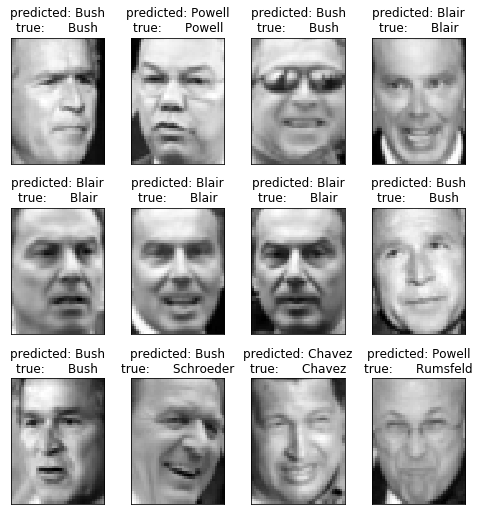

In [32]:
plot_gallery(X_test, prediction_titles, h, w)

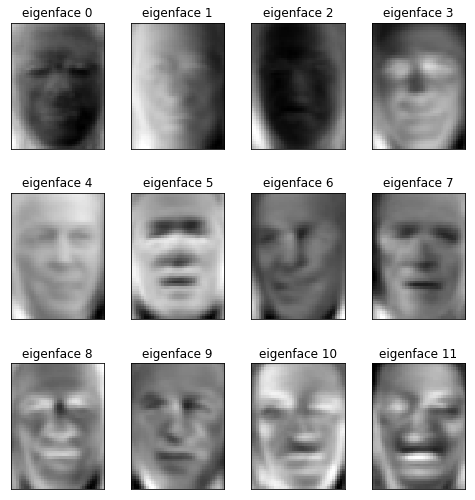

In [33]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)


In [0]:
"""
SparsePCA: 
Principal component analysis (PCA) has the disadvantage that the components 
extracted by this method have exclusively dense expressions, i.e. they have 
non-zero coefficients when expressed as linear combinations of the original 
variables. This can make interpretation difficult.

For PCA in face recognition, components might not naturally map to parts of faces.

Sparse principal components yields a more parsimonious, interpretable 
representation, clearly emphasizing which of the original features contribute 
to the differences between samples.

In SparsePCA regularization term induces many zeros. Furthermore, the natural 
structure of the data causes the non-zero coefficients to be vertically adjacent.

optimization problem solved is 
(U*, V*) = arg min 1/2 sqr(|| X - UV ||) + alpha * || V ||

"""

In [0]:
from sklearn.decomposition import MiniBatchSparsePCA


mbatch_pca = MiniBatchSparsePCA (
    n_components=n_components,
    alpha=0.9,
    n_iter=100,
    batch_size=3,
    random_state=42, 
    normalize_components=True
).fit(X_train)

In [0]:
eigen_faces_sparse = mbatch_pca.components_.reshape((n_components, h, w))

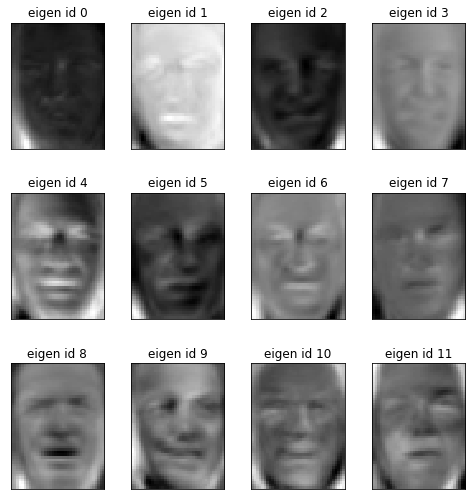

In [13]:
eigen_title_sparse = [ "eigen id %d"%i for i in range(eigen_faces_sparse.shape[0])]
plot_gallery(eigen_faces_sparse, eigen_title_sparse, h, w)

In [0]:
"""
TruncatedSVD implements a variant of singular value decomposition (SVD) that 
only computes the k largest singular values, where k is a user-specified parameter.

When TruncatedSVD is applied to term-document ( CountVectorizer, TfidfVectorizer )
then this transformation is known as Latent Semantic Analysis / Indexing

Mathematically, 

  X = X_k = U_k Sigma_k V.T_k
  
  U_k Sigma_k  is transformed X_k ie low rank matrix
  
  X_test can be tranformed as X_test V_k

TruncatedSVD is similar to PCA however, it works on sample matrices X directly 
instead of their covariate matrices

TruncatedSVD works best for TFIDF transformed data because feature values matches closer to 
Gaussian distribution.

"""

In [0]:
"""
Example 
Clustering text documents using k-means
"""

""" 
1. Uses Bag of word approach 
"""

In [0]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans
from optparse import OptionParser
import numpy as np

In [0]:
op=OptionParser()
op.add_option("--lsa", dest="n_components", type="int", help="Preprocess using LSA")
op.add_option("--no-minibatch", action="store_false", dest="minibatch", default=True, help="Use ordinary k-means algorithm")
(opts, args) = op.parse_args(rgv)

print("Number of components %d" % op.n_components)

In [16]:
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

2019-06-07 02:56:11,233 Downloading 20news dataset. This may take a few minutes.
2019-06-07 02:56:11,235 Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


3387 documents
4 categories



In [0]:
hasher = HashingVectorizer(n_features=10000, stop_words='english', alternate_sign=False, norm=None, binary=False)
vectorizer = make_pipeline(hasher, TfidfTransformer())

In [0]:
X = vectorizer.fit_transform(dataset.data)

In [19]:
print("n_samples: %d, n_features: %d" % X.shape)

n_samples: 3387, n_features: 10000


In [0]:
svd = TruncatedSVD(3000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

In [31]:
print("n_samples: %d, n_features: %d" % X.shape)
explained_variance = svd.explained_variance_ratio_.sum()
print("explained ratio %d" % int(explained_variance * 100))

n_samples: 3387, n_features: 3000
explained ratio 99


In [0]:
km = MiniBatchKMeans(n_clusters=true_k, init="k-means++", n_init=1, init_size=1000, batch_size=1000, verbose=True)

In [35]:
km.fit(X)

Init 1/1 with method: k-means++
Inertia for init 1/1: 964.061275
Minibatch iteration 1/400: mean batch inertia: 0.971091, ewa inertia: 0.971091 
Minibatch iteration 2/400: mean batch inertia: 0.966163, ewa inertia: 0.968182 
Minibatch iteration 3/400: mean batch inertia: 0.964224, ewa inertia: 0.965846 
Minibatch iteration 4/400: mean batch inertia: 0.963613, ewa inertia: 0.964527 
Minibatch iteration 5/400: mean batch inertia: 0.963725, ewa inertia: 0.964054 
Minibatch iteration 6/400: mean batch inertia: 0.963109, ewa inertia: 0.963496 
Minibatch iteration 7/400: mean batch inertia: 0.963319, ewa inertia: 0.963392 
Minibatch iteration 8/400: mean batch inertia: 0.961696, ewa inertia: 0.962391 
Minibatch iteration 9/400: mean batch inertia: 0.963232, ewa inertia: 0.962887 
Minibatch iteration 10/400: mean batch inertia: 0.963006, ewa inertia: 0.962957 
Minibatch iteration 11/400: mean batch inertia: 0.962000, ewa inertia: 0.962392 
Minibatch iteration 12/400: mean batch inertia: 0.963

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=1, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=True)

In [36]:
print("Homogenity score %0.3f" % metrics.homogeneity_score(labels, km.labels_))

Homogenity score 0.439


In [37]:
print("Adjusted Rand-Index %0.3f" % metrics.adjusted_rand_score(labels, km.labels_))

Adjusted Rand-Index 0.368


In [38]:
print("Silhouette score %0.3f " % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Silhouette score 0.005 


In [0]:
"""
Factor Analysis
A simple Linear Generative Model with Gausssian latent variables

The observations are assumed to be caused by a linear transformation of lower
dimension latent factors and added Gaussian noise.
These factors are distributed with zero mean and unit covariance

Factor Analysis performs maximum likeihood estimate on loading matrix, the 
transformation of latent variables to an observed one using EM techniques

"""

In [40]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

X, _ = load_digits(return_X_y=True)
print(X.shape)
transformer = FactorAnalysis(n_components=7, random_state=42)

X_fa = transformer.fit_transform(X)
print(X_fa.shape)

(1797, 64)
(1797, 7)
